<a href="https://colab.research.google.com/github/23f1002944/EDA-Probability-Distributions/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np

# Generate a discrete uniform distribution from 1 to 100
data = np.random.randint(1, 101, size=100000)
df = pd.DataFrame(data, columns=['X'])

In [23]:
# Generate a discrete uniform distribution for column Y from 1 to 100
data_y = np.random.randint(1, 101, size=100000)
df['Y'] = data_y

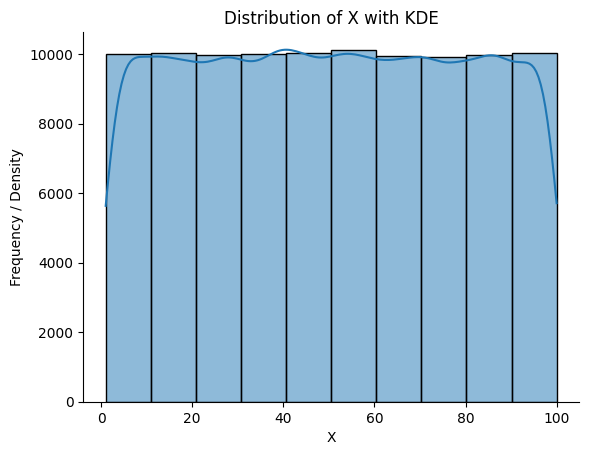

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot uniform distribution of X
sns.histplot(df['X'], bins=10, kde=True)
plt.title('Distribution of X with KDE')
plt.xlabel('X')
plt.ylabel('Frequency / Density')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

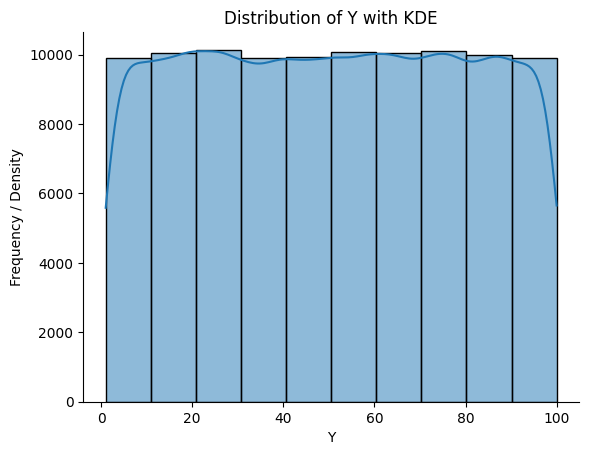

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot Uniform Distribution with KDE for column Y
sns.histplot(df['Y'], bins=10, kde=True)
plt.title('Distribution of Y with KDE')
plt.xlabel('Y')
plt.ylabel('Frequency / Density')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [19]:
# Generate a third column Z which is sum of X + Y, we call this Convolution
df['Z'] = df['X'] + df['Y']

,X,Y,Z
0,79,27,106
1,70,58,128
2,43,98,141
3,2,45,47
4,89,98,187


Mathematically convolution is

$P(Z = z) = P(X + Y = z) = \sum_{x=-\infty}^{\infty} P(X = x) \, P(Y = z - x)$

Given we have distribution of X and Y, we can calculate Z = X + Y and plot its distribution just using a formula like other distributions


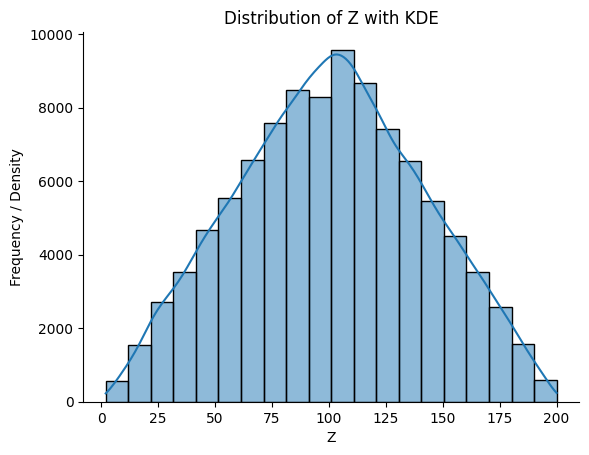

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot histogram with KDE for column Z
sns.histplot(df['Z'], bins=20, kde=True) # Increased bins for better representation of sum
plt.title('Distribution of Z with KDE')
plt.xlabel('Z')
plt.ylabel('Frequency / Density')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

But what is the use of convolution if we already can sum two columns and plot
Well, when we want to predict the population inference from sample data, we do not have enough data, we just know distributions of 2 columns, we can simply calculate convolution expression of third column and plot it directly to predict the sum of both columns

For uniform let's do it

$P(Z = z) = \sum_{x=\max(a, z-d)}^{\min(b, z-c)} P(X = x) \, P(Y = z - x),$

In [31]:
# Calculate the theoretical probability mass function (PMF) for Z = X + Y
# where X and Y are discrete uniform from 1 to 100.
# The sum Z can range from 1 + 1 = 2 to 100 + 100 = 200.

theoretical_pmf_z = {}
for z in range(2, 201):
    prob_z = 0
    for x in range(1, 101):
        y = z - x
        if 1 <= y <= 100:
            prob_z += (1/100) * (1/100)
    theoretical_pmf_z[z] = prob_z

# Convert the theoretical PMF to a DataFrame for easier handling and plotting
theoretical_df = pd.DataFrame(list(theoretical_pmf_z.items()), columns=['Z_value', 'Theoretical_Probability'])

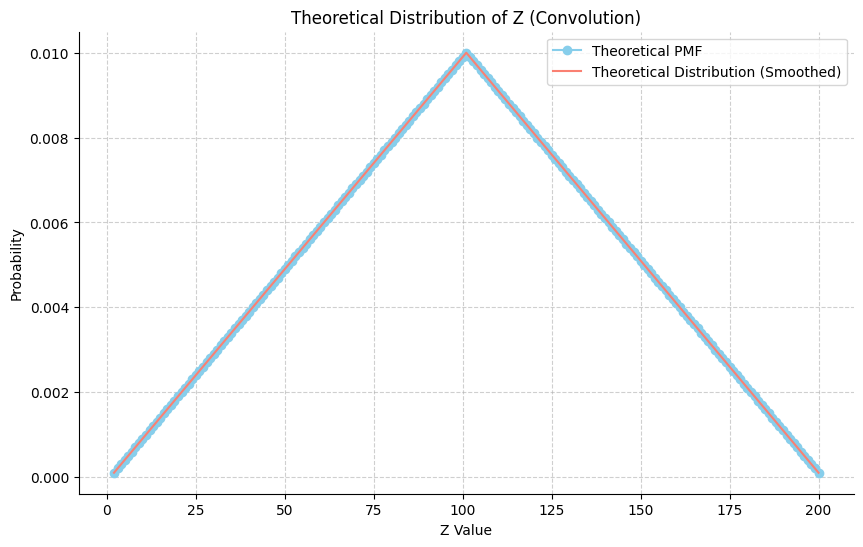

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.plot(theoretical_df['Z_value'], theoretical_df['Theoretical_Probability'], marker='o', linestyle='-', color='skyblue', label='Theoretical PMF')
sns.lineplot(data=theoretical_df, x='Z_value', y='Theoretical_Probability', color='salmon', label='Theoretical Distribution (Smoothed)')


plt.title('Theoretical Distribution of Z (Convolution)')
plt.xlabel('Z Value')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

This looks the same as previous uniform histogram, this convolution expression can be very helpful a lot of times

For example,
Poisonn= Number of success per fixed interval of time or space

Now the number of males arriving in a hospital can be modeled with var X, avg number of males can be L1

Females as var Y, avg number of females per unit can be L2

We have distribution of the sample of both Poisonns, what if we want to model both the Females and Males, to get total no of patients in the hospital from sample data, to calculate the amount of hospital staff

We can do that by having another Poisonn, for which Lambda will be (L1+L2)

This is when we apply convolution to two Poisonns

This way we can calculated total expected patients, without any knowledge of actual data, provided we have an already well established probability model for the X and Y variables

$$f_Z(z) = \frac{e^{-(\lambda_1 + \lambda_2)} (\lambda_1 + \lambda_2)^z}{z!}, \quad z = 0, 1, 2, \dots,$$

If we add two Poisson random variables